In [1]:
import gmsh
import numpy as np

el metodo initialize 'abre' el programa.

In [2]:
gmsh.initialize()

'armamos' el modelo que queremos modificar:

In [3]:
gmsh.model.add('test2')

In [4]:
lc = 1
L = 10

Definimos las coordenadas de los puntos

In [5]:
p1 = gmsh.model.geo.addPoint(0, 0, 0, lc/5)
p2 = gmsh.model.geo.addPoint(L, 0, 0, lc*2) 
p3 = gmsh.model.geo.addPoint(L, L, 0, lc/2) 
p4 = gmsh.model.geo.addPoint(0, L, 0, lc/5) 

Luego definimos las lineas

In [6]:
l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)

Las curvas nos van a servir para definir los bordes de nuestro modelo.

In [7]:
C1 = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])

Y las superficies:

In [8]:
S1 = gmsh.model.geo.addPlaneSurface([C1])

le avisamos que ya estan todos los elementos geométricos:

In [9]:
gmsh.model.geo.synchronize()

Ahora definimos algo que nos va a servir para las condiciones de contorno.

Y definimos `Grupos Físicos` para definir bordes, etc

In [10]:
Empotrado = gmsh.model.addPhysicalGroup(1, [l4])
gmsh.model.setPhysicalName(1,Empotrado,'Empotrado')

In [11]:
Traccionado = gmsh.model.addPhysicalGroup(1, [l2])
gmsh.model.setPhysicalName(1,Traccionado,'Traccionado')

In [12]:
Superficie = gmsh.model.addPhysicalGroup(2,[S1])
gmsh.model.setPhysicalName(2,Superficie, 'Superficie')

Finalemente generamos el mallado

In [13]:
gmsh.model.mesh.generate(2)

# El objeto mesh

El mallado es un objeto del cual podemos recuperar la información necesaria para interactuar con nuestro motor de elementos finitos. Por ejemplo para la informacion de los nodos:

In [14]:
NodeInfo = gmsh.model.mesh.get_nodes()

In [15]:
NodeInfo[1].shape

(1986,)

In [16]:
NodeInfo

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

esta variable node info guarda:
- los numeros de nodo
- la matriz de nodo

In [17]:
NumeroNodos = NodeInfo[0].shape[0]

In [18]:
NumeroNodos

662

es la cantidad de nodos del modelo.

La matriz de nodos es dada en lista, nos conviene pasarla a matriz para tener lo que venimos trabajando:

In [19]:
MN = NodeInfo[1].reshape(NumeroNodos , 3)

In [20]:
MN

array([[ 0.        ,  0.        ,  0.        ],
       [10.        ,  0.        ,  0.        ],
       [10.        , 10.        ,  0.        ],
       ...,
       [ 0.27752326,  7.99330786,  0.        ],
       [ 3.12934365,  7.42068487,  0.        ],
       [ 1.62017966,  9.61569192,  0.        ]])

## Elementos

In [21]:
ElementInfo = gmsh.model.mesh.get_elements()

Este Objeto tiene mucha información:

In [22]:
ElementInfo

(array([ 1,  2, 15], dtype=int32),
 [array([1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293,
         1294, 1295,    1,    2,    3,    4,    5,    6,    7,    8,    9,
           10, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305,
         1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316,
         1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326,   11,
           12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
           23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
           34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
           45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
           56,   57,   58,   59,   60], dtype=uint64),
  array([  61,   62,   63, ..., 1276, 1277, 1278], dtype=uint64),
  array([1279, 1280, 1281, 1282], dtype=uint64)],
 [array([  1,   5,   5,   6,   6,   7,   7,   8,   8,   9,   9,  10,  10,
          11,  11,  12,  12,  13,  13,  14,  

- los tipos de elementos

In [23]:
ElementInfo[0]

array([ 1,  2, 15], dtype=int32)

Las etiquetas de los triángulos

In [24]:
ElementInfo[1][1]

array([  61,   62,   63, ..., 1276, 1277, 1278], dtype=uint64)

In [25]:
ElementInfo[2][1].shape

(3654,)

In [26]:
ETYPES = ElementInfo[0]

Podemos ser un poco más precabios y tomar solo los triángulos, que son los que nos interesan para la guía 

In [27]:
ETAGS, ELEMENTS = gmsh.model.mesh.get_elements_by_type(2)

In [28]:
ETAGS

array([  61,   62,   63, ..., 1276, 1277, 1278], dtype=uint64)

In [29]:
ELEMENTS

array([121, 365, 536, ..., 625, 278, 657], dtype=uint64)

la matriz de conectividad también hay que reformatear para tener lo que estamos acostumbrados.

In [30]:
MC = ELEMENTS.reshape([ETAGS.shape[0],3])

In [31]:
MC

array([[121, 365, 536],
       [ 12, 378, 628],
       [365, 138, 536],
       ...,
       [621, 421, 651],
       [637, 243, 645],
       [625, 278, 657]], dtype=uint64)

# Condiciones de contorno

Con las definiciones de los Physical Groups, podemos sacar los índices de los nodos que estan empotrados o traccionados:

In [32]:
NodosEmpotrados = gmsh.model.mesh.get_nodes_for_physical_group(1,Empotrado)

In [33]:
NodosTraccionados = gmsh.model.mesh.get_nodes_for_physical_group(1,Traccionado)

In [34]:
NodosEmpotrados[0]

array([  1,   4,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104],
      dtype=uint64)

In [35]:
NodosTraccionados

(array([ 2,  3, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=uint64),
 array([10.        ,  0.        ,  0.        , 10.        , 10.        ,
         0.        , 10.        ,  1.72599223,  0.        , 10.        ,
         3.22855602,  0.        , 10.        ,  4.53661385,  0.        ,
        10.        ,  5.6753442 ,  0.        , 10.        ,  6.66666657,
         0.        , 10.        ,  7.52966285,  0.        , 10.        ,
         8.28094471,  0.        , 10.        ,  8.93497358,  0.        ,
        10.        ,  9.50433881,  0.        ]))

In [36]:
ElementInfo[1]

[array([1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293,
        1294, 1295,    1,    2,    3,    4,    5,    6,    7,    8,    9,
          10, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305,
        1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316,
        1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60], dtype=uint64),
 array([  61,   62,   63, ..., 1276, 1277, 1278], dtype=uint64),
 array([1279, 1280, 1281, 1282], dtype=uint64)]

# Condiciones de contorno

Necesito las longitudes de las lineas 'traccionadas' para saber las fuerzas equivalentes sobre los nodos del borde traccionado. 
Lamentablemente no hay un 'get_elements_for_physical_group' pero hay un 'get_nodes_by_pysical_group' y 'elements_by_type'.

In [37]:
Ltags, Lineas = gmsh.model.mesh.get_elements_by_type(1)

In [38]:
ML = Lineas.reshape(Ltags.shape[0],2)

In [39]:
NodosTraccionados[0]

array([ 2,  3, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=uint64)

nuestra busqueda de lineas en el borde traccionado:

In [40]:
LineasTraccionadas = []
for line in ML:
    if line[0] in NodosTraccionados[0] and  line[1] in NodosTraccionados[0]:
        LineasTraccionadas.append(line)
#        print(line)
        
LineasTraccionadas = np.array(LineasTraccionadas)
#    if line[0] in NodosTraccionados and line[1] in NodosTraccionados:

Y con esto las lingitudes de los bordes:

In [41]:
Longitudes = np.abs( MN[LineasTraccionadas[:,0]-1,1] - MN[LineasTraccionadas[:,1]-1,1] )

Ahora puedo calcular las fuerzas:

In [42]:
Fuerzas = np.zeros((3*NumeroNodos,1))
espesor = 1
tension = 1000 #Pa

for l, linea in enumerate(LineasTraccionadas):
    Flocal = np.array([[1],[1]])*tension*espesor*Longitudes[l]
    n1 = linea[0]
    n2 = linea[1]
    #print(Flocal)
    Fuerzas[ np.array([3*(n1-1), 3*(n2-1)], dtype=int)] += Flocal
    

Con los índices de los nodos empotrados puedo aplicar las condiciones de contorno

Y tambien tegno las coordenadas:

In [43]:
MNE = NodosEmpotrados[1].reshape((NodosEmpotrados[0].shape[0], 3))

In [44]:
NodosTraccionados = gmsh.model.mesh.get_nodes_for_physical_group(1, Traccionado)

Con los índices de los nodos, puedo rebuscarmelas para obtener las fuerzas distribuidas:

In [45]:
MNT = NodosTraccionados[1].reshape((NodosTraccionados[0].shape[0], 3))

# Nos divertimos un rato

In [46]:
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(10,10))

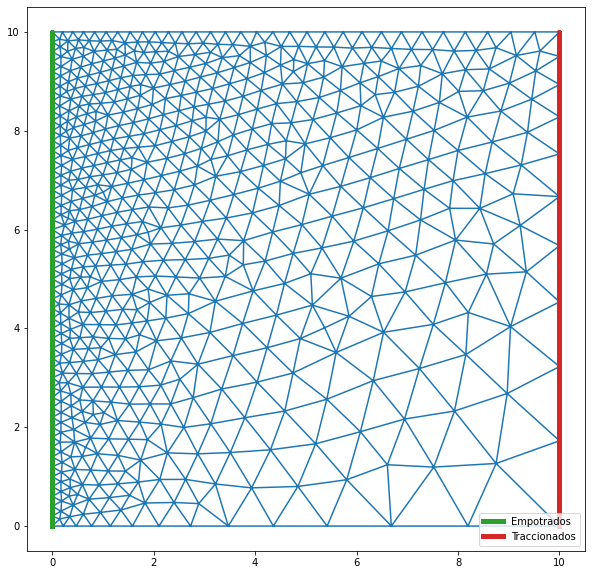

In [47]:
#plt.plot(MN[:,0],MN[:,1],'ok')
plt.triplot(MN[:,0],MN[:,1],MC-MC.min())
plt.plot(MNE[:,0], MNE[:,1], label='Empotrados', lw = 5)
plt.plot(MNT[:,0], MNT[:,1], label='Traccionados', lw = 5)
plt.legend()

# Agregar Resulatados

Inventemos por ahora un resultado vectorial

In [48]:
DESP = np.hstack((MN[:,0].reshape(-1,1)*0.1, MN[:,1].reshape(-1,1)*0, MN[:,2].reshape(-1,1)*0))

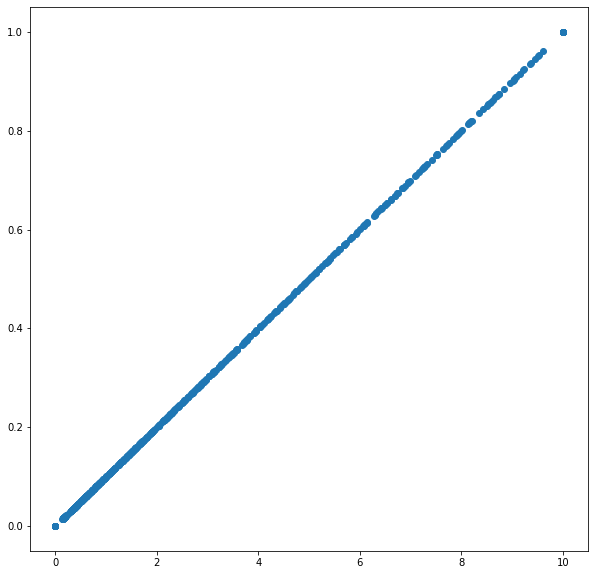

In [49]:
plt.plot(MN[:,0], DESP[:,0],'o')

Devemos iniciar una visualizacion:

In [50]:
desps = gmsh.view.add("desp")

devemos guardar esos datos en la visualizacion:

In [51]:
Desps = gmsh.view.addModelData(desps, 0, 'test2', 'NodeData', NodeInfo[0], DESP, numComponents=3)

Guardo las fuerzas externas

In [52]:
fx = gmsh.view.add('fuerzas')
Fz = gmsh.view.addModelData(fx, 0, 'test2','NodeData',NodeInfo[0], Fuerzas.reshape(NumeroNodos,3), numComponents=3)

Ahora le agrego un view para tensiones

In [53]:
v_t = gmsh.view.add("tens")

In [54]:
T = MC.mean(axis=1).reshape(-1,1)

In [55]:
Tensiones = gmsh.view.addModelData(v_t, 0, 'test2', 'ElementData', ETAGS, T , numComponents=1 )

vamos a jugar tambien con estos datos escalares, dependientes del tiempo:

In [56]:
Temps = gmsh.view.add("Temperaturas")

In [57]:
for i in range(100):
    gmsh.view.addModelData(Temps,i, 'test2','NodeData',NodeInfo[0],MN[:,0].reshape(-1,1)*i,numComponents=1)
    

Escribamos estos resultados con el mesh para ver mas tarde. Por razones de legibilidad humana, queremos escribir el mallado en versión 2 y no en version 4 (el default)

In [58]:
gmsh.option.setNumber("Mesh.MshFileVersion", 2.2)
gmsh.write('TestMeshView_IN.msh')
gmsh.view.write(1,"TestMeshView_OUT.msh",append=True)

visualicemos el resultado:

In [59]:
gmsh.fltk.run()

In [60]:
gmsh.finalize()